*********
# Wyscout- Events
There are 7 different event datasets avaiable: England's Premier Leauge and Championsip,European Championship, French first leauge, Germany's Bundesleauge, Italy's Serie A and Spanish La Liga. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
laliga = pd.read_json('./football-data/events_Spain.json')
ligue1 = pd.read_json('./football-data/events_France.json')
seriea = pd.read_json('./football-data/events_Italy.json')
bundesleauge = pd.read_json('./football-data/events_Germany.json')

ValueError: Could not reserve memory block

In [2]:
premierleauge = pd.read_json('./football-data/events_England.json')
premierleauge.shape

(643150, 12)

In [4]:
ligue1.shape

NameError: name 'ligue1' is not defined

In [ ]:
bundesleauge.shape

In [ ]:
laliga.shape

In [ ]:
laliga.columns

## Distrubtion of different events of the leauges

In [5]:
# laLiga_eventType, laliga_freq = np.unique(laliga['eventName'], return_counts=True)
# ligue1_eventType, ligue1_freq = np.unique(ligue1['eventName'], return_counts=True)
# premierLeauge_eventType, premierLeauge_freq = np.unique(premierleauge['eventName'], return_counts=True)
# serieA_eventType, serieA_freq = np.unique(seriea['eventName'], return_counts=True)
# bundesleuge_eventType, bundesleuge_freq = np.unique(bundesleauge['eventName'], return_counts=True)

In [4]:
# fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, figsize=(20,30))

# ax1.set_title('Laliga event distrubution', fontsize=20)
# ax1.bar(laLiga_eventType, laliga_freq /laliga_freq.sum())
# ax1.set_ylabel('Density', fontsize=15)
# ax1.tick_params(axis='x',rotation=20)
# ax1.set_xlabel('Event type', fontsize=15)



# ax2.set_title('Ligue1 event distrubution')
# ax2.bar(ligue1_eventType, ligue1_freq)
# ax2.tick_params(axis='x',rotation=20)
# ax2.set_xlabel('Event type', fontsize=15)


# ax3.set_title('Premier Leauge event distrubution')
# ax3.bar(premierLeauge_eventType, premierLeauge_freq / premierLeauge_freq.sum())
# ax3.tick_params(axis='x',rotation=20)
# ax3.set_xlabel('Event type', fontsize=15)



# ax4.set_title('Serie A event distrubution')
# ax4.bar(serieA_eventType, serieA_freq / serieA_freq.sum())
# ax4.tick_params(axis='x',rotation=20)
# ax4.set_xlabel('Event type', fontsize=15)


# ax5.set_title('Bundesliga event distrubution')
# ax5.bar(bundesleuge_eventType, bundesleuge_freq/ bundesleuge_freq.sum())
# ax5.tick_params(axis='x',rotation=20)
# ax5.set_xlabel('Event type', fontsize=15)

# bundesleuge_eventType
# plt.tight_layout()
# plt.show()

### There is an equal amount of different event types which might make is easier to create a model that is general

Let us examine more closley one of the leauges

****

In [5]:
premierleauge.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [3]:
subEvent, sfreq = np.unique(premierleauge['subEventName'], return_counts=True)
subEvent

array(['', 'Acceleration', 'Air duel', 'Ball out of the field',
       'Clearance', 'Corner', 'Cross', 'Foul', 'Free Kick',
       'Free kick cross', 'Free kick shot', 'Goal kick',
       'Goalkeeper leaving line', 'Ground attacking duel',
       'Ground defending duel', 'Ground loose ball duel', 'Hand foul',
       'Hand pass', 'Head pass', 'High pass', 'Late card foul', 'Launch',
       'Out of game foul', 'Penalty', 'Protest', 'Reflexes',
       'Save attempt', 'Shot', 'Simple pass', 'Simulation', 'Smart pass',
       'Throw in', 'Time lost foul', 'Touch', 'Violent Foul', 'Whistle'],
      dtype=object)

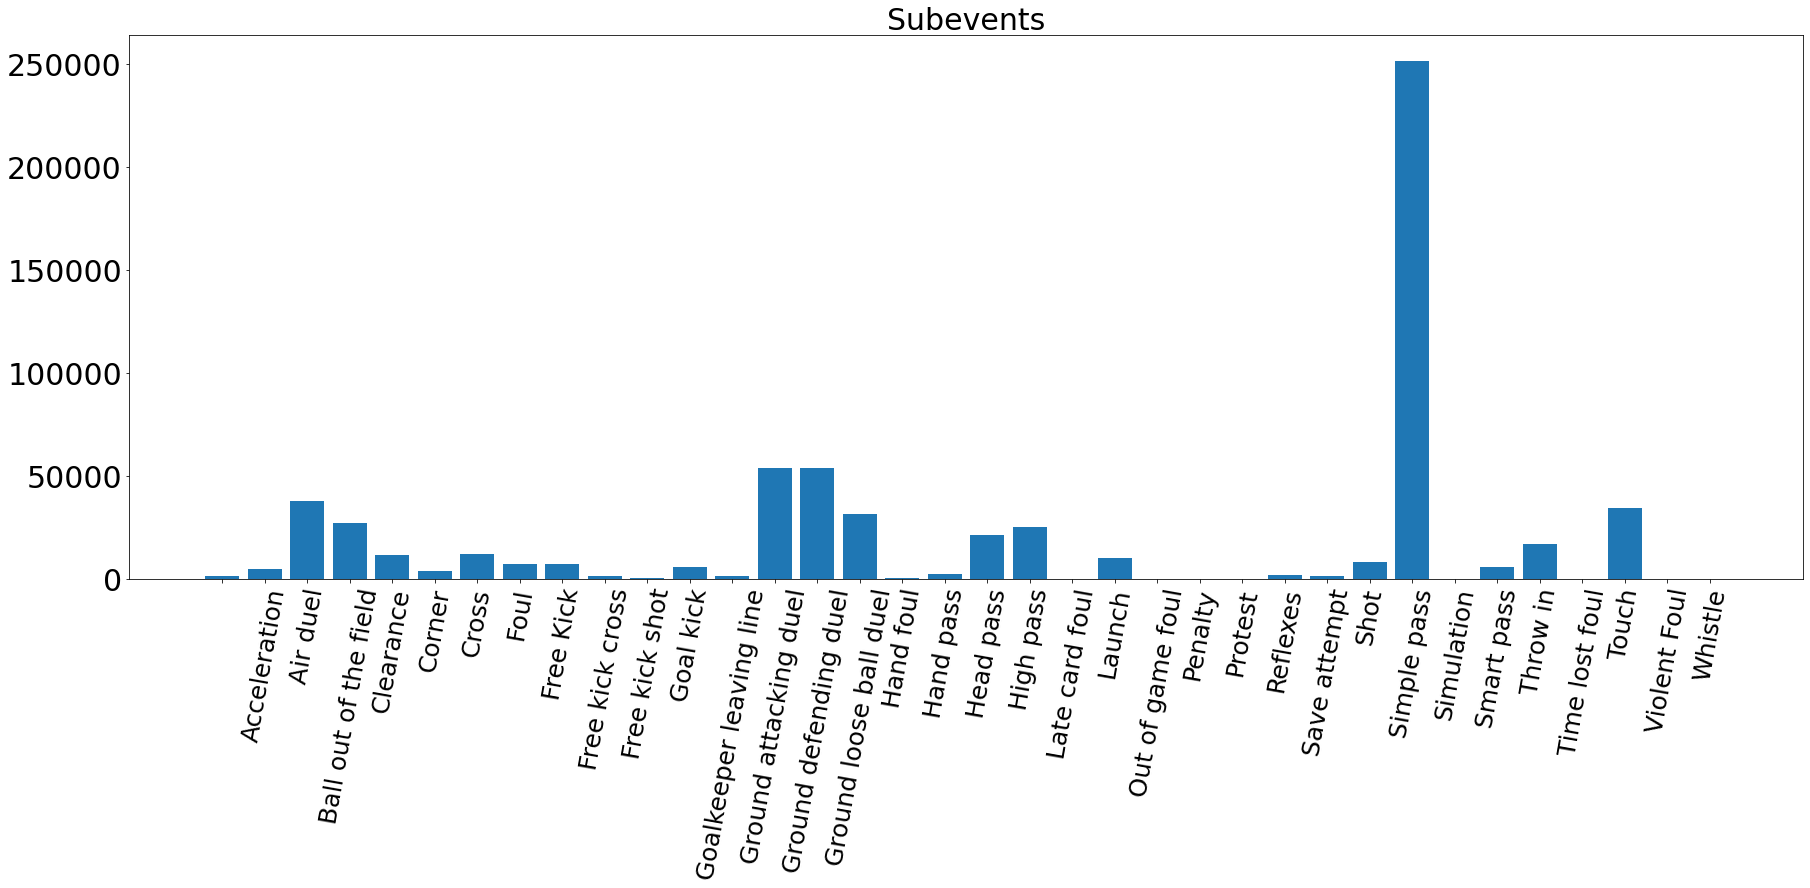

In [14]:
plt.figure(figsize=(30,10))
plt.bar(subEvent, sfreq)
plt.xticks(rotation=80, fontsize=25)
plt.yticks(fontsize=30)
plt.title("Subevents", fontsize=30)
plt.show()

# Position and Event-Type

In [15]:
# players = pd.read_json('./preprocessed/players.json')
import os
path = os.getcwd()
players = pd.read_json(path + '/preprocessed/players.json' )
players

,wyId,firstName,lastName,currentTeamId,team,team_country,role.name,age,weight,height,foot
0,393228,Malang,Sarr,3775,O.G.C. Nice C\u00f4te d'Azur,France,Defender,21,73,182,left
1,393230,Over,Mandanda,3772,FC Girondins de Bordeaux,France,Goalkeeper,22,72,176,
2,32793,Alfred John Momar,N'Diaye,683,M\u00e1laga Club de F\u00fatbol,Spain,Midfielder,30,82,187,right
3,393247,Ibrahima,Konat\u00e9,2975,Rasen Ballsport Leipzig,Germany,Defender,21,84,192,right
4,33,Jasper,Cillessen,676,FC Barcelona,Spain,Goalkeeper,31,83,185,right
...,...,...,...,...,...,...,...,...,...,...,...
2393,520617,Yann Aurel,Bisseck,2463,1. FC K\u00f6ln,Germany,Defender,20,83,194,right
2394,105332,Darijo,Srna,3173,Cagliari Calcio,Italy,Defender,38,78,178,right
2395,99479,\u0141ukasz,Teodorczyk,3163,Udinese Calcio,Italy,Forward,29,79,188,right
2396,284470,Ante,\u0106ori\u0107,3158,AS Roma,Italy,Midfielder,23,59,176,right


## Amount of players for each position

<BarContainer object of 4 artists>

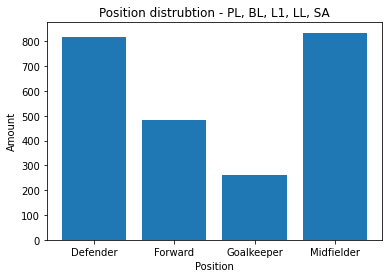

In [9]:
role, freq = np.unique(players['role.name'], return_counts=True)
plt.title('Position distrubtion - PL, BL, L1, LL, SA')
plt.xlabel('Position')
plt.ylabel('Amount')
plt.bar(role, freq)

************
# Smaller dataset for expermients
In order to now wait for the computation with the rather large dataset of ~600000 datapoints we take a sample of the Premier Leauge event dataset as we have to pair each datapoint with an event it will take O^n time. We have to compare each events playerwiyd to each players wyid.

In [16]:
SAMPLE_SIZE = 20000
event_tags = pd.read_csv('./football-data/tags2name.csv')

randnums= np.random.randint(0,len(premierleauge),SAMPLE_SIZE)
sample_events = premierleauge.loc[randnums]



In [17]:
sample_events.reset_index(drop=True)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],28291,"[{'y': 26, 'x': 71}, {'y': 23, 'x': 61}]",2500020,Pass,1610,2H,315.108613,85,244599877
1,8,Simple pass,[{'id': 1801}],70122,"[{'y': 8, 'x': 53}, {'y': 72, 'x': 39}]",2499836,Pass,1611,1H,1492.084674,85,206759302
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",3324,"[{'y': 77, 'x': 63}, {'y': 52, 'x': 65}]",2500020,Duel,1610,1H,571.229904,10,244599063
3,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",9285,"[{'y': 15, 'x': 31}, {'y': 9, 'x': 36}]",2499870,Duel,1659,1H,1698.580677,13,213172198
4,3,Throw in,[{'id': 1801}],7938,"[{'y': 100, 'x': 69}, {'y': 82, 'x': 76}]",2499793,Free Kick,1611,1H,45.314776,36,196237660
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8,Launch,[{'id': 1802}],8240,"[{'y': 79, 'x': 21}, {'y': 50, 'x': 57}]",2500056,Pass,1623,2H,358.933966,84,242957125
19996,1,Ground defending duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",8471,"[{'y': 91, 'x': 58}, {'y': 87, 'x': 36}]",2500021,Duel,1628,2H,701.109451,12,234976615
19997,8,High pass,[{'id': 1802}],302518,"[{'y': 96, 'x': 60}, {'y': 51, 'x': 87}]",2499849,Pass,1659,2H,2922.522973,83,210587931
19998,1,Ground attacking duel,"[{'id': 703}, {'id': 1801}]",9293,"[{'y': 6, 'x': 79}, {'y': 4, 'x': 82}]",2499779,Duel,1659,1H,338.684225,11,192318028


## Add player position, age and team to sample_events dataframe
The minimum valueable information to have in the screening about the player is the position, age and team. Therefore we are adding it to our events.

In [21]:
 for key, row in sample_events.iterrows():
        playerId = row['playerId']
        mask = players['wyId'] == playerId
        
        
#         #Check so player exists in the preprocessed player dataframe
#         if mask.sum() > 0:
     
#             player = players[mask]
            
#             #Position
#             position = player['role.name']
#             sample_events.loc[key, 'position'] = position.values[0]
            
#             #Age
#             age = player['age']
#             sample_events.loc[key, 'age'] = age.values[0]
            
#             #team
#             team = player['team']
#             sample_events.loc[key, 'team'] = team.values[0]
            
#             #player name
#             player = player['firstName'] +  " " + player['lastName']
#             sample_events.loc[key, 'player name'] = player.values[0]
            


 

In [92]:
sample_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,position,age,team,player name
578778,8,Simple pass,[{'id': 1801}],48,"[{'y': 17, 'x': 28}, {'y': 28, 'x': 54}]",2500061,Pass,1624,1H,780.554560,85,244031527,Defender,33.0,Tottenham Hotspur FC,Jan Vertonghen
331897,8,Simple pass,[{'id': 1802}],3327,"[{'y': 11, 'x': 62}, {'y': 7, 'x': 61}]",2499915,Pass,1613,2H,122.262507,85,217769280,Forward,30.0,Newcastle United FC,Jos\u00e9 Luis Sanmart\u00edn Mato
626323,8,Simple pass,[{'id': 1801}],8945,"[{'y': 96, 'x': 21}, {'y': 76, 'x': 25}]",2500088,Pass,1624,2H,1447.851270,85,249307492,Defender,30.0,Tottenham Hotspur FC,Kieran Trippier
426255,8,Simple pass,[{'id': 1801}],8242,"[{'y': 58, 'x': 33}, {'y': 30, 'x': 36}]",2499971,Pass,1651,1H,246.169124,85,225849137,Defender,28.0,Brighton & Hove Albion FC,Shane Duffy
354709,8,Simple pass,[{'id': 1801}],171283,"[{'y': 59, 'x': 52}, {'y': 45, 'x': 47}]",2499928,Pass,1609,2H,2671.152964,85,218385332,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261704,3,Throw in,[{'id': 1801}],149019,"[{'y': 100, 'x': 76}, {'y': 92, 'x': 76}]",2499874,Free Kick,1631,2H,1526.558328,36,213086011,Defender,33.0,Leicester City FC,Danny Simpson
175034,8,Cross,"[{'id': 302}, {'id': 401}, {'id': 801}, {'id':...",383,"[{'y': 81, 'x': 79}, {'y': 48, 'x': 91}]",2499824,Pass,1619,1H,1527.282120,80,202905908,NaN,NaN,NaN,NaN
223409,1,Ground defending duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",210044,"[{'y': 84, 'x': 58}, {'y': 91, 'x': 54}]",2499852,Duel,1624,2H,134.921185,12,210181570,Midfielder,26.0,Tottenham Hotspur FC,Eric Dier
598175,1,Ground defending duel,"[{'id': 501}, {'id': 702}, {'id': 1801}]",257899,"[{'y': 94, 'x': 11}, {'y': 100, 'x': 12}]",2500072,Duel,1612,1H,2307.525655,12,247040621,Defender,23.0,Liverpool FC,Joe Gomez


## Visualize event distrubution and tag attributes for each position

In [93]:
maskDef = sample_events['position'] == 'Defender' 
maskMid = sample_events['position'] == 'Midfielder' 
maskFor = sample_events['position'] == 'Forward'


In [96]:

##DEFENDERS
defenderEvents = sample_events[maskDef.values]
def_event_type, freqD = np.unique(defenderEvents['eventName'], return_counts=True)


##MIDFIELDERS
midfieldersEvents = sample_events[maskMid.values]
mid_event_type, freqM = np.unique(midfieldersEvents['eventName'], return_counts=True)

##FORWARDS
forwardEvents = sample_events[maskFor.values]
for_event_type, freqF = np.unique(forwardEvents['eventName'], return_counts=True)






ValueError: shape mismatch: objects cannot be broadcast to a single shape

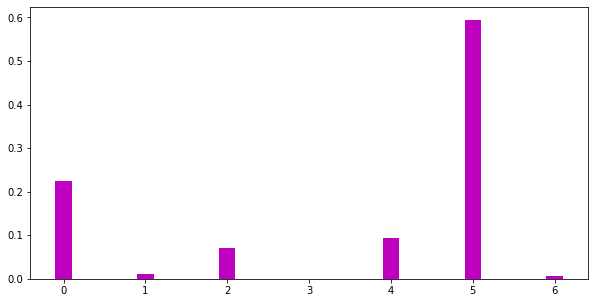

In [97]:

plt.figure(figsize=(10,5))
ax1 = plt.subplot()




# ###EVENT DISTRUBITON

x = np.arange(len(def_event_type))
ax1.bar(x ,freqD/freqD.sum(), width=.2, color='m', label='Defender')
ax1.bar(x + 0.22,freqM/freqM.sum(), width=.2, color='g', label='Midfielder')
ax1.bar(x+0.46, freqF/freqF.sum(), width=.2, color='y', label='Forward')
ax1.legend(loc="upper left")

ax1.set_xticks(x) 
ax1.set_xticklabels(for_event_type, rotation=60)
ax1.set_xlabel('Main events')
ax1.set_ylabel('Probability density')
ax1.set_title('Main Event distrubution positions - Sample Premier Leauge \n '+ str(SAMPLE_SIZE) + ' Events', fontsize=17)

plt.show()




## Pass Distrubution different positions

In [98]:
mask = midfieldersEvents['eventName'] == 'Pass'
mask2 = defenderEvents['eventName'] == 'Pass'
mask3 = forwardEvents['eventName'] == 'Pass'

passMid = midfieldersEvents[mask]
passDef = defenderEvents[mask2]
passFor = forwardEvents[mask3]

d, freqD = np.unique(passDef['subEventName'], return_counts=True)
m, freqM = np.unique(passMid['subEventName'], return_counts=True)
f, freqF = np.unique(passFor['subEventName'], return_counts=True)


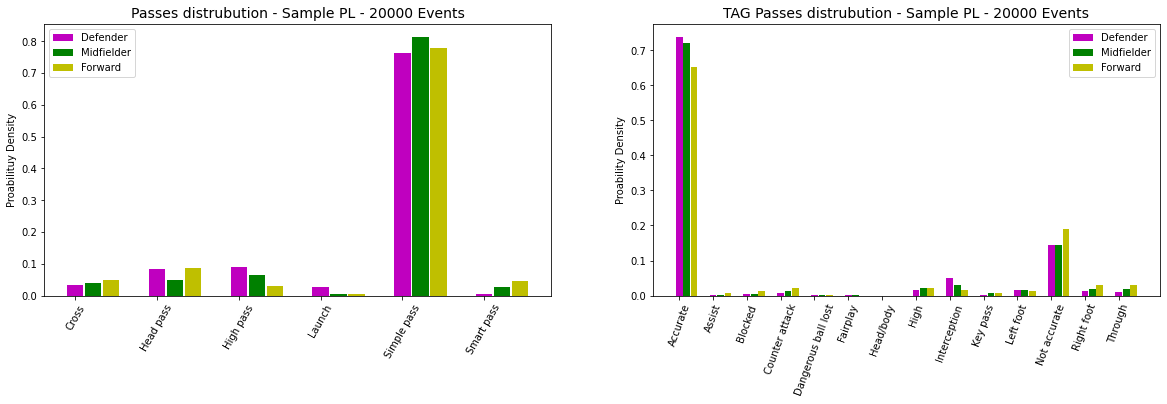

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))


ax1.set_title('Passes distrubution - Sample PL - ' + str(SAMPLE_SIZE) + ' Events', fontsize=14)

x = np.arange(len(d))

ax1.bar(x ,freqD/freqD.sum(), width=.2, color='m', label='Defender')
ax1.bar(x + 0.22 ,freqM/freqM.sum(), width=.2, color='g', label='Midfielder')
ax1.bar(x + 0.44 ,freqF/freqF.sum(), width=.2, color='y', label='Forward')

ax1.legend(loc="upper left")

ax1.set_ylabel('Proabilituy Density')
ax1.set_xticks(x)
ax1.set_xticklabels(d, rotation=60)
# plt.show()




### TAG PASSES

passes = passDef.append(passMid).append(passFor)
columns = passes.columns

tag_descriptions = pd.DataFrame(columns=passes.columns)


tagDictCount = {}

##Tag distrubition passes
tag_descriptions = []
for key, row in passes.iterrows():
    tags = row['tags']
    position = row['position']
    
    #iterate over the tags for eache vents
    for t in tags:
        desc = event_tags[event_tags['Tag'] == t['id']]['Description'].values[0]
        if (position, desc) not in tagDictCount.keys():
            tagDictCount[(position, desc)] = 1
        else:
            tagDictCount[(position, desc)] += 1
            
            

##Unique tags
xlabels= np.unique([x[1] for x in tagDictCount.keys()])


defY = dict.fromkeys(xlabels, 0)
midY = defY.copy()
forY = defY.copy()


for key in tagDictCount:
    if(key[0] == "Defender"):
        defY[key[1]] = tagDictCount[key]
    elif(key[0] == "Midfielder"):
        midY[key[1]] = tagDictCount[key]
    else:
        forY[key[1]] = tagDictCount[key]


x = np.arange(len(xlabels))


ax2.set_title('TAG Passes distrubution - Sample PL - ' + str(SAMPLE_SIZE) + ' Events', fontsize=14)


ax2.bar(x, np.array(list(defY.values())) / sum(list(defY.values())), width=.2, color='m', label='Defender')
ax2.bar(x + 0.22, np.array(list(midY.values())) / sum(list(midY.values())), width=.2, color='g', label='Midfielder')
ax2.bar(x + 0.44, np.array(list(forY.values())) / sum(list(forY.values())), width=.2, color='y', label='Forward')
ax2.legend(loc="upper right")

ax2.set_ylabel('Proability Density')
ax2.set_xticks(x)
ax2.set_xticklabels(xlabels, rotation=70)
plt.show()


# Duels subevents distrubution
The forwards have a lot more duels, let us see what kind of duels. Let us further investigate what kind of duels.

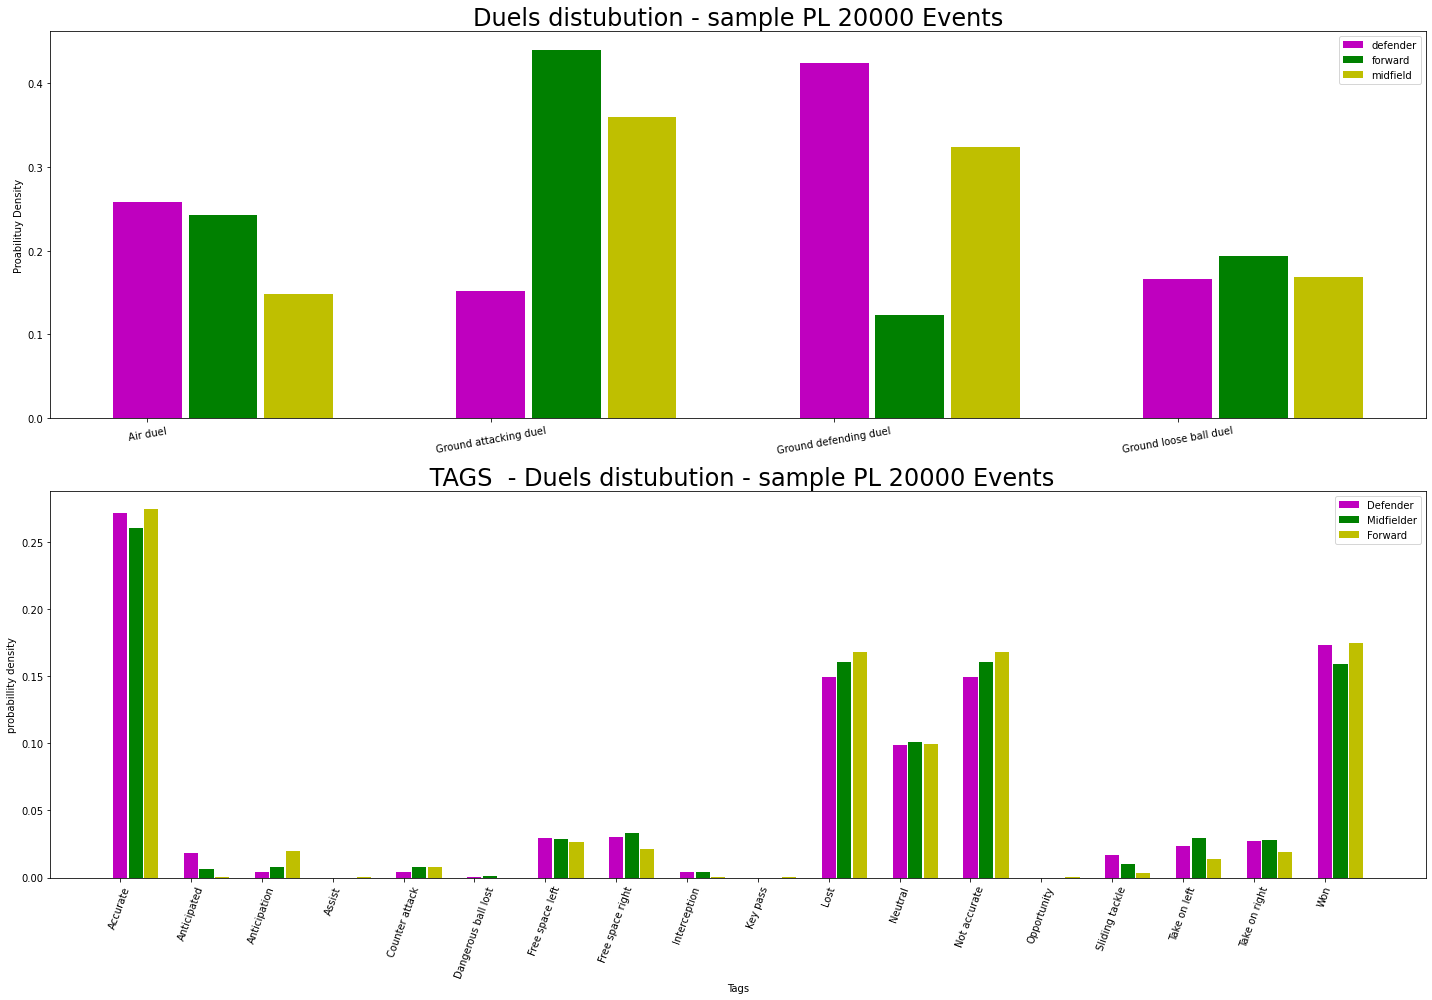

In [100]:
mask = forwardEvents['eventName'] == 'Duel'
mask2 = defenderEvents['eventName'] == 'Duel'
mask3 = midfieldersEvents['eventName'] == 'Duel'



duelsD = defenderEvents[mask2]
duelsM = midfieldersEvents[mask3]
duelsF = forwardEvents[mask]
d, freq = np.unique(duelsF['subEventName'], return_counts=True)
f, freq2 = np.unique(duelsD['subEventName'], return_counts=True)
m, freq3 = np.unique(duelsM['subEventName'], return_counts=True)


fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,14))


x = np.arange(len(d))

ax1.set_title('Duels distubution - sample PL '+ str(SAMPLE_SIZE) + ' Events', fontsize=24)
ax1.set_xticks(x)
ax1.set_xticklabels(d, rotation=10)
ax1.bar(x ,freq2/freq2.sum(), width=.2, color='m', label='defender')
ax1.bar(x + 0.22 ,freq/freq.sum(), width=.2, color='g', label='forward')
ax1.bar(x+0.44 ,freq3/freq3.sum(), width=.2, color='y', label='midfield')


ax1.legend(loc="upper right")

ax1.set_ylabel('Proabilituy Density')
ax1.set_label('Events')




### TAG DUELS ###########################

duels = duelsD.append(duelsM).append(duelsF)
columns = duels.columns

tag_descriptions = pd.DataFrame(columns=duels.columns)


tagDictCount = {}
for key, row in duels.iterrows():
    tags = row['tags']
    position = row['position']

    #Iteratate over the tags for each event
    for t in tags:  
#         print(desc)
        desc = event_tags[event_tags['Tag'] == t['id']]['Description'].values[0]
    
        if (position, desc) not in tagDictCount.keys():
            tagDictCount[(position, desc)] = 1
        else:
            tagDictCount[(position, desc)] += 1
                

##Unique tags
xlabels= np.unique([x[1] for x in tagDictCount.keys()])

defY = dict.fromkeys(xlabels, 0)
midY = defY.copy()
forY = defY.copy()


for key in tagDictCount:
    if(key[0] == "Defender"):
        defY[key[1]] = tagDictCount[key]
    elif(key[0] == "Midfielder"):
        midY[key[1]] = tagDictCount[key]
    else:
        forY[key[1]] = tagDictCount[key]


# ax2.set_xticks(np.arange(xlabels))
# ax2.bar(x ,freq2/freq2.sum(), width=.2, color='m', label='defender')
# ax2.bar(x + 0.22 ,freq/freq.sum(), width=.2, color='g', label='forward')
# ax2.bar(x+0.44 ,freq3/freq3.sum(), width=.2, color='y', label='midfield')

x = np.arange(len(xlabels))

ax2.bar(x, np.array(list(defY.values())) / sum(list(defY.values())), width=.2, color='m', label='Defender')
ax2.bar(x + 0.22, np.array(list(midY.values())) / sum(list(midY.values())), width=.2, color='g', label='Midfielder')
ax2.bar(x + 0.44, np.array(list(forY.values())) / sum(list(forY.values())), width=.2, color='y', label='Forward')

ax2.set_title(' TAGS  - Duels distubution - sample PL '+ str(SAMPLE_SIZE) + ' Events', fontsize=24)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabels, rotation=70)
ax2.legend(loc="upper right")
ax2.set_ylabel("probabillity density")
ax2.set_xlabel("Tags")
plt.tight_layout()

## Others on the ball distrubution

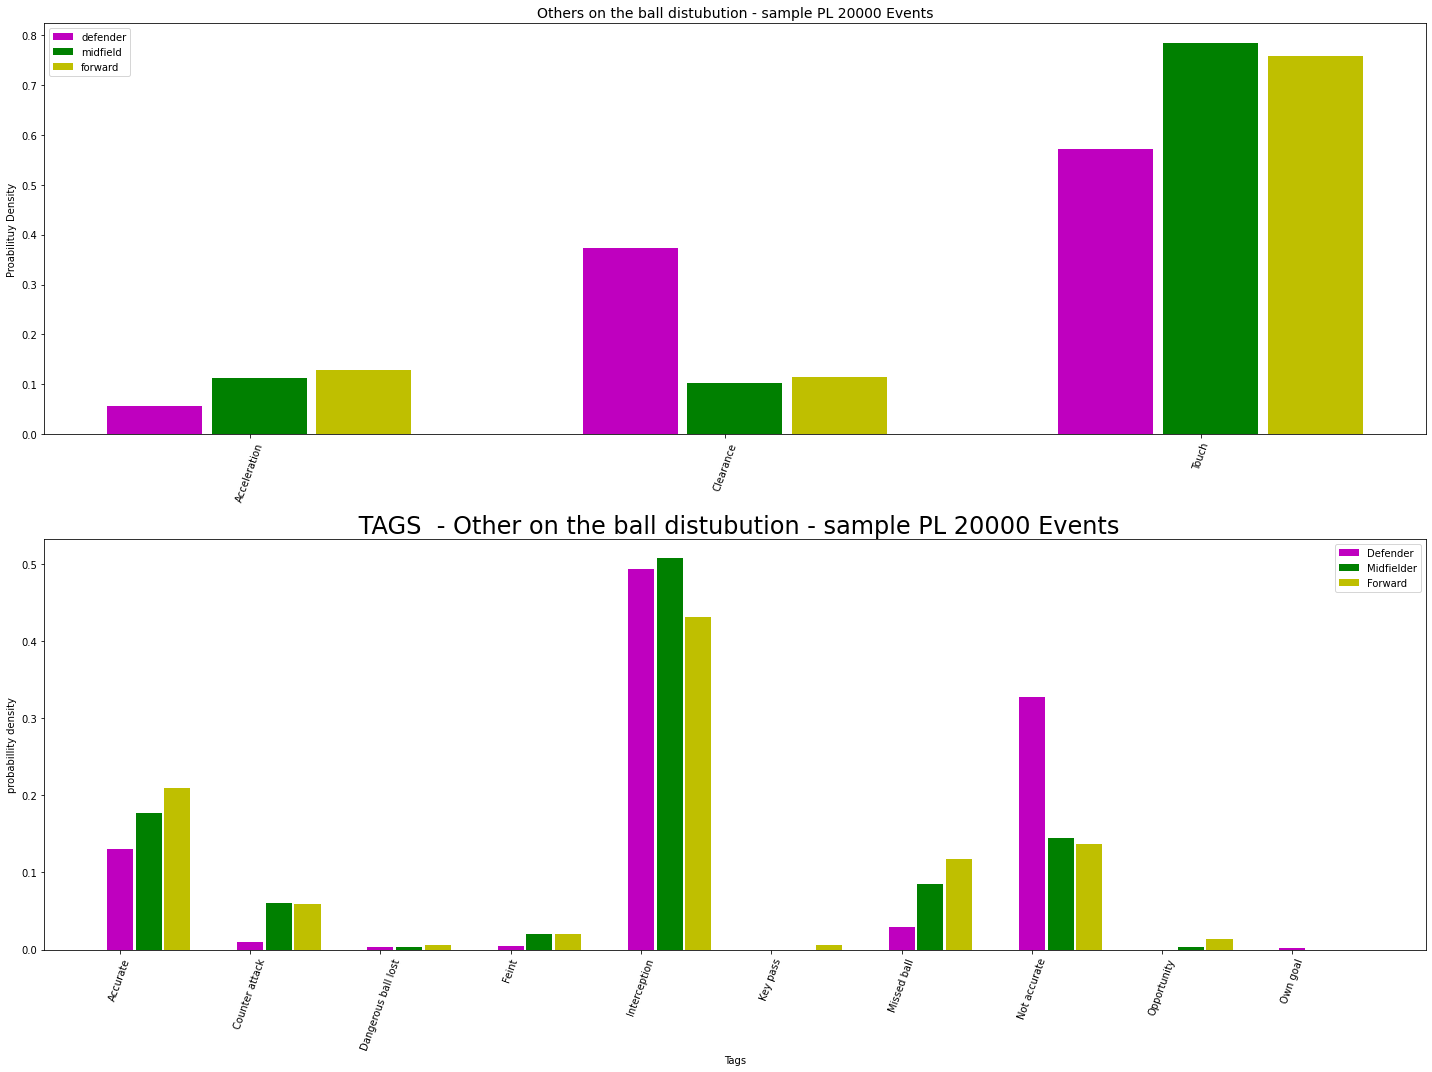

In [101]:
mask1 = forwardEvents['eventName'] == 'Others on the ball'
mask2 = defenderEvents['eventName'] == 'Others on the ball'
mask3 = midfieldersEvents['eventName'] == 'Others on the ball'


othersF = forwardEvents[mask1]
othersD = defenderEvents[mask2]
othersM = midfieldersEvents[mask3]
d, freq = np.unique(othersF['subEventName'], return_counts=True)
f, freq2 = np.unique(othersD['subEventName'], return_counts=True)
m, freq3 = np.unique(othersM['subEventName'], return_counts=True)


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))


x = np.arange(len(d))

ax1.set_xticks(x+0.2)

ax1.set_title('Others on the ball distubution - sample PL '+ str(SAMPLE_SIZE) + ' Events', fontsize=14)

ax1.bar(x ,freq2/freq2.sum(), width=.2, color='m', label='defender')
ax1.bar(x+0.22 ,freq3/freq3.sum(), width=.2, color='g', label='midfield')
ax1.bar(x + 0.44 ,freq/freq.sum(), width=.2, color='y', label='forward')


ax1.legend(loc="upper left")

ax1.set_ylabel('Proabilituy Density')
# ax1.bar(x+0.5, f,freq2, width=.3)
ax1.set_xticklabels( d, rotation=70)



### TAG OTHERS ON THE BALL ###########################

balls = othersF.append(othersD).append(othersM)

tagDictCount = {}
for key, row in balls.iterrows():
    tags = row['tags']
    position = row['position']

    #Iteratate over the tags for each event
    for t in tags:  
        desc = event_tags[event_tags['Tag'] == t['id']]['Description'].values[0]
    
        if (position, desc) not in tagDictCount.keys():
            tagDictCount[(position, desc)] = 1
        else:
            tagDictCount[(position, desc)] += 1
                

##Unique tags
xlabels= np.unique([x[1] for x in tagDictCount.keys()])

defY = dict.fromkeys(xlabels, 0)
midY = defY.copy()
forY = defY.copy()


for key in tagDictCount:
    if(key[0] == "Defender"):
        defY[key[1]] = tagDictCount[key]
    elif(key[0] == "Midfielder"):
        midY[key[1]] = tagDictCount[key]
    else:
        forY[key[1]] = tagDictCount[key]



##SET THE BAR PLOT
x = np.arange(len(xlabels))

ax2.bar(x, np.array(list(defY.values())) / sum(list(defY.values())), width=.2, color='m', label='Defender')
ax2.bar(x + 0.22, np.array(list(midY.values())) / sum(list(midY.values())), width=.2, color='g', label='Midfielder')
ax2.bar(x + 0.44, np.array(list(forY.values())) / sum(list(forY.values())), width=.2, color='y', label='Forward')

ax2.set_title(' TAGS  - Other on the ball distubution - sample PL '+ str(SAMPLE_SIZE) + ' Events', fontsize=24)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabels, rotation=70)
ax2.legend(loc="upper right")
ax2.set_ylabel("probabillity density")
ax2.set_xlabel("Tags")
plt.tight_layout()


plt.show()



***********
### Elicite relevant information for each position
After analysis of the above diagrams and industry expertise the relevant key metrics are calculated for each positions. These are then exported for ranking or machine learning algos.


***********
# DEFENDER

## Duels

In [102]:
maskDef = sample_events['position'] == 'Defender' 
defenderEvents = sample_events[maskDef.values]
defenderEvents

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,position,age,team,player name
578778,8,Simple pass,[{'id': 1801}],48,"[{'y': 17, 'x': 28}, {'y': 28, 'x': 54}]",2500061,Pass,1624,1H,780.554560,85,244031527,Defender,33.0,Tottenham Hotspur FC,Jan Vertonghen
626323,8,Simple pass,[{'id': 1801}],8945,"[{'y': 96, 'x': 21}, {'y': 76, 'x': 25}]",2500088,Pass,1624,2H,1447.851270,85,249307492,Defender,30.0,Tottenham Hotspur FC,Kieran Trippier
426255,8,Simple pass,[{'id': 1801}],8242,"[{'y': 58, 'x': 33}, {'y': 30, 'x': 36}]",2499971,Pass,1651,1H,246.169124,85,225849137,Defender,28.0,Brighton & Hove Albion FC,Shane Duffy
462806,8,Simple pass,[{'id': 1801}],70389,"[{'y': 89, 'x': 57}, {'y': 81, 'x': 64}]",2499992,Pass,1619,2H,182.231029,85,230775508,Defender,29.0,Southampton FC,C\u00e9dric Ricardo Alves Soares
507055,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",8582,"[{'y': 35, 'x': 89}, {'y': 0, 'x': 0}]",2500018,Shot,1633,2H,598.629270,100,233410041,Defender,31.0,West Ham United FC,Aaron Cresswell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187227,8,Simple pass,[{'id': 1801}],25854,"[{'y': 87, 'x': 54}, {'y': 76, 'x': 61}]",2499831,Pass,1639,2H,1083.363561,85,207592763,Defender,26.0,Everton FC,Kurt Happy Zouma
408236,8,Simple pass,[{'id': 1801}],7855,"[{'y': 63, 'x': 47}, {'y': 37, 'x': 47}]",2499960,Pass,1609,1H,984.141743,85,225020998,Defender,35.0,Arsenal FC,Laurent Koscielny
141898,8,Simple pass,[{'id': 1801}],7885,"[{'y': 6, 'x': 73}, {'y': 23, 'x': 71}]",2499804,Pass,1619,2H,2276.318339,85,198451406,Defender,31.0,Southampton FC,Ryan Bertrand
261704,3,Throw in,[{'id': 1801}],149019,"[{'y': 100, 'x': 76}, {'y': 92, 'x': 76}]",2499874,Free Kick,1631,2H,1526.558328,36,213086011,Defender,33.0,Leicester City FC,Danny Simpson


##  duels have to have a tag of 'Won', 'Lost' or 'Neutral'.
Important information about the duel that could be considered


In [103]:
duels = defenderEvents[defenderEvents['eventName'] == "Duel"]

duels_tags = []

duelColumns = np.unique(duels['subEventName'])
duelColumnsAmount = duelColumns + ' won'
duelColumns= np.append(duelColumns, 'playerId')
duelColumns = np.concatenate((duelColumns, duelColumnsAmount, ['total duels', 'player name', 'age', 'team']))
defenderPlayers = pd.DataFrame(columns=duelColumns)
defenderPlayers['playerId']  = np.unique(defenderEvents['playerId'])
defenderPlayers = defenderPlayers.fillna(0)

for key, row in duels.iterrows():
    subEvent = row['subEventName']
    playerId = row['playerId']
    name = row['player name']
    age = row['age']
    team = row['team']
    tags = row['tags']
    won = False
    ##Get success / neutral or won  
    for t in tags:
        id = t['id']
        tag_info = event_tags[event_tags['Tag'] == id]
        if tag_info['Description'].values[0] == 'Won':
            won = True
            
    index = defenderPlayers[defenderPlayers['playerId'] == playerId].index[0]
    defenderPlayers.loc[index, 'player name'] = name
    defenderPlayers.loc[index, 'team'] = team
    defenderPlayers.loc[index, 'age'] = age
    defenderPlayers.loc[index, subEvent] += 1
    defenderPlayers.loc[index, "total duels"] += 1
    if(won):
        defenderPlayers.loc[index, subEvent + " won"] += 1
        

In [104]:
defenderPlayers.shape
defenderPlayers = defenderPlayers.fillna(0)
defenderPlayers

,Air duel,Ground attacking duel,Ground defending duel,Ground loose ball duel,playerId,Air duel won,Ground attacking duel won,Ground defending duel won,Ground loose ball duel won,total duels,player name,age,team
0,2,1,2,0,36,1,0,0,0,5,Toby Alderweireld,31.0,Tottenham Hotspur FC
1,9,0,5,2,48,6,0,3,1,16,Jan Vertonghen,33.0,Tottenham Hotspur FC
2,3,2,1,2,74,0,2,0,1,8,Ragnar Klavan,35.0,Cagliari Calcio
3,5,5,17,3,107,0,2,5,0,30,Erik Pieters,32.0,Stoke City FC
4,4,0,3,0,132,2,0,1,0,7,Terence Kongolo,26.0,Huddersfield Town FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,1,415747,0,0,0,1,1,Jack Simpson,23.0,AFC Bournemouth
145,0,0,1,0,415748,0,0,0,0,1,Josh Tymon,21.0,Stoke City FC
146,0,0,0,0,423162,0,0,0,0,0,0,0.0,0
147,0,0,4,0,447812,0,0,3,0,4,Thomas Edwards,21.0,Stoke City FC


## Calculate Relevant metrics  - DUEL

In [105]:
for key, row in defenderPlayers.iterrows():
    #total won
    defenderPlayers.loc[key,'total duels won'] = defenderPlayers.loc[key,'Air duel won'] + defenderPlayers.loc[key,'Ground attacking duel won'] + defenderPlayers.loc[key,'Ground defending duel won'] + defenderPlayers.loc[key,'Ground loose ball duel won'] 
    ##Duel percentage
    defenderPlayers.loc[key, 'duel %'] =  defenderPlayers.loc[key, 'total duels won'] / defenderPlayers.loc[key, 'total duels']
    
    #Air duel %
    defenderPlayers.loc[key, 'Air duel %'] =  defenderPlayers.loc[key, 'Air duel won'] / defenderPlayers.loc[key, 'Air duel']

     #Ground defending duel %
    defenderPlayers.loc[key, 'Ground attacking duel %'] =  defenderPlayers.loc[key, 'Ground attacking duel won'] / defenderPlayers.loc[key, 'Ground attacking duel']

    #Ground defending duel %
    defenderPlayers.loc[key, 'Ground defending duel %'] =  defenderPlayers.loc[key, 'Ground defending duel won'] / defenderPlayers.loc[key, 'Ground defending duel']

     #Ground loose ball duel %
    defenderPlayers.loc[key, 'Ground loose ball duel %'] =  defenderPlayers.loc[key, 'Ground loose ball duel won'] / defenderPlayers.loc[key, 'Ground loose ball duel']

    
    

/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [106]:
defenderPlayers = defenderPlayers.fillna(0)


## Sort by duel won percentage

In [107]:

defenderPlayers.sort_values(by=['duel %'], ascending=False)

,Air duel,Ground attacking duel,Ground defending duel,Ground loose ball duel,playerId,Air duel won,Ground attacking duel won,Ground defending duel won,Ground loose ball duel won,total duels,player name,age,team,total duels won,duel %,Air duel %,Ground attacking duel %,Ground defending duel %,Ground loose ball duel %
103,1,0,0,0,61979,1,0,0,0,1,Kyle Bartley,29.0,West Bromwich Albion FC,1.0,1.0,1.0,0.0,0.0,0.0
39,2,1,0,0,8240,2,1,0,0,3,S\u00e9amus Coleman,32.0,Everton FC,3.0,1.0,1.0,1.0,0.0,0.0
144,0,0,0,1,415747,0,0,0,1,1,Jack Simpson,23.0,AFC Bournemouth,1.0,1.0,0.0,0.0,0.0,1.0
126,0,1,0,0,239411,0,1,0,0,1,Tyrone Mings,27.0,AFC Bournemouth,1.0,1.0,0.0,1.0,0.0,0.0
70,0,0,1,1,9403,0,0,1,1,2,Craig Cathcart,31.0,Watford FC,2.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0,0,1,0,8135,0,0,0,0,1,Luke Shaw,25.0,Manchester United FC,0.0,0.0,0.0,0.0,0.0,0.0
128,0,0,1,1,240559,0,0,0,0,2,Ja\u00efro Riedewald,24.0,Crystal Palace FC,0.0,0.0,0.0,0.0,0.0,0.0
127,0,0,0,0,240032,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
13,2,2,10,0,3436,0,0,0,0,14,Javier Manquillo Gait\u00e1n,26.0,Newcastle United FC,0.0,0.0,0.0,0.0,0.0,0.0


## Plot amount of duels to % won 

In [109]:
X = defenderPlayers['total duels'].values
Y = ((defenderPlayers['duel %'] * 100).values).round(0)
z = defenderPlayers['player name'].values

In [1]:


plt.figure(figsize=(12,8))
plt.xlabel('Total amount of duels')
plt.ylabel('% won')
plt.title('Amount of duels % won', fontsize=20)

l = [(x,y) for (x,y) in zip(X,Y)]
        

#Set sizes of scatter plot
uniqueSize = {}
for i in range(len(l)):
    
    if l[i] not in uniqueSize:
        uniqueSize[l[i]] = 1
    else:
        uniqueSize[l[i]] += 1
        

for i,name in enumerate(z):    
    x = round(X[i],1)
    y = round(Y[i],1)
    plt.scatter(x, y, marker='o', color='red', s=uniqueSize[(x,y)]*50)
    
    if uniqueSize[(x,y)] > 4:
        plt.text(x+0.3, y+0.3, name, fontsize=12)


NameError: name 'plt' is not defined

## DEFENDER - Passing

In [112]:
## INITLIZING

#Get all relevant revents
passes = defenderEvents[defenderEvents['eventName'] == "Pass"]

##Adding relevant columns
columns  = np.unique(passes['subEventName'])
columnsAcc = columns + " acc"
columnsAccPer = columns + " acc %"
columns = np.concatenate((['playerId'], columns, ['Total pass'], columnsAcc, columnsAccPer, ['Total passes acc %']))
defenderPlayersPasses = pd.DataFrame(columns=columns)
defenderPlayersPasses
#Adding all players
playerIds = list(np.unique(defenderEvents['playerId']))
defenderPlayersPasses['playerId'] = playerIds
defenderPlayersPasses = defenderPlayersPasses.fillna(0)



# tag_descriptions = ""
for key, row in passes.iterrows():
    
    subEvent = row['subEventName']
    playerId = row['playerId']
    tags = row['tags']

    tag_desc = [event_tags[event_tags['Tag'] == x['id']]['Description'].values[0] for x in tags]

    index = defenderPlayersPasses[defenderPlayersPasses['playerId'] == playerId].index[0]
    
    defenderPlayersPasses.loc[index, 'Total pass'] += 1
    defenderPlayersPasses.loc[index, subEvent] +=1

    if "Accurate" in tag_desc:
        defenderPlayersPasses.loc[index, subEvent +" acc"] +=1




In [113]:
defenderPlayersPasses

,playerId,Cross,Head pass,High pass,Launch,Simple pass,Smart pass,Total pass,Cross acc,Head pass acc,...,Launch acc,Simple pass acc,Smart pass acc,Cross acc %,Head pass acc %,High pass acc %,Launch acc %,Simple pass acc %,Smart pass acc %,Total passes acc %
0,36,0,1,6,0,19,0,26,0,1,...,0,19,0,0,0,0,0,0,0,0
1,48,1,7,8,1,58,0,75,0,4,...,0,55,0,0,0,0,0,0,0,0
2,74,0,2,1,0,39,0,42,0,2,...,0,37,0,0,0,0,0,0,0,0
3,107,1,1,2,2,14,2,22,0,0,...,1,13,0,0,0,0,0,0,0,0
4,132,0,0,2,1,11,0,14,0,0,...,1,11,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,415747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,415748,0,0,0,0,2,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
146,423162,0,0,0,0,2,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
147,447812,1,0,1,0,4,0,6,0,0,...,0,4,0,0,0,0,0,0,0,0


### Caculate relevant metrics

Let us add subevent accuracy and totalt accuracy in percentage.

In [114]:

accTot = defenderPlayersPasses.filter(regex="acc$", axis=1).sum(axis=1).values.flatten()
totPass =  defenderPlayersPasses.filter(regex="Total pass", axis=1).sum(axis=1).values.flatten()
totals = accTot / totPass

##TOTAL ACC
defenderPlayersPasses['Total passes acc %'] = totals.round(3)


/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
##SUBEVENT ACC
accColums = defenderPlayersPasses.filter(regex="acc$", axis=1)
countColums = defenderPlayersPasses.filter(items=np.unique(passes['subEventName']), axis=1)

accPer = accColums.values / countColums.values
accPer = pd.DataFrame(accPer)
accPer.fillna(0)
col = defenderPlayersPasses.filter(regex="^(?!Total).*acc %", axis=1).columns.values

defenderPlayersPasses[col] = accPer
defenderPlayersPasses= defenderPlayersPasses.fillna(0)

/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [116]:
defenderPlayersPasses.sort_values(ascending=False,by=['Total pass'], inplace=True)

In [117]:
defenderPlayersPasses

,playerId,Cross,Head pass,High pass,Launch,Simple pass,Smart pass,Total pass,Cross acc,Head pass acc,...,Launch acc,Simple pass acc,Smart pass acc,Cross acc %,Head pass acc %,High pass acc %,Launch acc %,Simple pass acc %,Smart pass acc %,Total passes acc %
109,70086,0,5,7,0,86,0,98,0,2,...,0,86,0,0.0,0.400000,0.285714,0.0,1.000000,0.0,0.918
92,25553,1,4,1,1,74,1,82,0,2,...,1,70,0,0.0,0.500000,0.000000,1.0,0.945946,0.0,0.890
1,48,1,7,8,1,58,0,75,0,4,...,0,55,0,0.0,0.571429,0.750000,0.0,0.948276,0.0,0.867
43,8277,1,3,2,0,68,0,74,0,3,...,0,66,0,0.0,1.000000,0.500000,0.0,0.970588,0.0,0.946
123,167145,4,1,1,1,54,1,62,0,0,...,1,50,0,0.0,0.000000,0.000000,1.0,0.925926,0.0,0.823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,21333,0,0,0,0,1,0,1,0,0,...,0,1,0,0.0,0.000000,0.000000,0.0,1.000000,0.0,1.000
48,8392,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000
142,402884,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000
144,415747,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000


In [213]:
defenderPlayersPasses.columns

Index(['playerId', 'Cross', 'Head pass', 'High pass', 'Launch', 'Simple pass',
       'Smart pass', 'Total pass', 'Cross acc', 'Head pass acc',
       'High pass acc', 'Launch acc', 'Simple pass acc', 'Smart pass acc',
       'Cross acc %', 'Head pass acc %', 'High pass acc %', 'Launch acc %',
       'Simple pass acc %', 'Smart pass acc %', 'Total passes acc %'],
      dtype='object')

## DEFENDER - others on the ball

Subevents  = cleanrence, touch
Tags = missed ball, interception, dangerous ball

In [119]:
## INITLIZING

#Get all relevant revents
othersOnTheBall = defenderEvents[defenderEvents['eventName'] == "Others on the ball"]

##Adding relevant columns
columns  = np.array(["Clearance", "Touch"], dtype=object)
columnsQ  = np.unique(othersOnTheBall['subEventName'])
columnsInter = columns + ' interception'



columns = np.concatenate((['playerId'], columns, columnsInter, ['Total others on the ball']))
defenderPlayersOthers = pd.DataFrame(columns=columns)
# #Adding all players
playerIds = list(np.unique(defenderEvents['playerId']))
defenderPlayersOthers['playerId'] = playerIds
defenderPlayersOthers = defenderPlayersOthers.fillna(0)



# # tag_descriptions = ""
for key, row in othersOnTheBall.iterrows():
    
    subEvent = row['subEventName']
    playerId = row['playerId']
    tags = row['tags']

    tag_desc = [event_tags[event_tags['Tag'] == x['id']]['Description'].values[0] for x in tags]

    index = defenderPlayersOthers[defenderPlayersOthers['playerId'] == playerId].index[0]
  
    if subEvent == "Clearance" or subEvent == "Touch":
        defenderPlayersOthers.loc[index, 'Total others on the ball'] += 1
        defenderPlayersOthers.loc[index, subEvent] +=1

        if ("Interception" in tag_desc):
            defenderPlayersOthers.loc[index, subEvent + ' interception'] += 1 
            
        
         
#     print(subEvent, tag_desc)
#     if "Accurate" in tag_desc:
#         defenderPlayersOthers.loc[index, subEvent +" acc"] +=1
        
#     if "Interception" in tag_desc:
#         defenderPlayersOthers.loc[index, subEvent +" interception"] +=1



    


In [120]:
defenderPlayersOthers.sum()

playerId                    11358958
Clearance                        233
Touch                            357
Clearance interception           131
Touch interception               154
Total others on the ball         590
dtype: int64

## calcultate relevant metrics Others on the ball
cleareance to touch interception will give us a ratio on how well a defender is on to intecept the ball and keep the ball within the team. 

In [121]:

accTot = defenderPlayersOthers.filter(regex="acc$", axis=1).sum(axis=1).values.flatten()
totPass =  defenderPlayersOthers.filter(regex="Total others on the ball", axis=1).sum(axis=1).values.flatten()
totals = accTot / totPass

##TOTAL ACC
defenderPlayersOthers['Total others on the ball acc %'] = totals.round(3)


/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
defenderPlayersOthers.sum()

playerId                          11358958.0
Clearance                              233.0
Touch                                  357.0
Clearance interception                 131.0
Touch interception                     154.0
Total others on the ball               590.0
Total others on the ball acc %           0.0
dtype: float64

In [123]:
## Concatenate passes, duels and others on the ball

In [124]:
defenderPlayersOthers

,playerId,Clearance,Touch,Clearance interception,Touch interception,Total others on the ball,Total others on the ball acc %
0,36,2,2,0,0,4,0.0
1,48,3,9,1,3,12,0.0
2,74,1,3,0,2,4,0.0
3,107,3,4,1,1,7,0.0
4,132,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...
144,415747,0,0,0,0,0,NaN
145,415748,0,0,0,0,0,NaN
146,423162,0,0,0,0,0,NaN
147,447812,1,0,1,0,1,0.0


##### Very low volume of scores and it is pretty much the same information as duel so for simplicity we will not keep it. 

**********

# Wrap it up + concatenate
Let us concatenate the Duels and Passes and export the dataframe for the defenders.

In [125]:
defenderPlayersPasses = defenderPlayersPasses.sort_values(by="playerId")
defenderPlayers = defenderPlayers.sort_values(by="playerId")

In [126]:
columns = list(defenderPlayersPasses.columns[1:])
columns

['Cross',
 'Head pass',
 'High pass',
 'Launch',
 'Simple pass',
 'Smart pass',
 'Total pass',
 'Cross acc',
 'Head pass acc',
 'High pass acc',
 'Launch acc',
 'Simple pass acc',
 'Smart pass acc',
 'Cross acc %',
 'Head pass acc %',
 'High pass acc %',
 'Launch acc %',
 'Simple pass acc %',
 'Smart pass acc %',
 'Total passes acc %']

In [127]:
defenderPlayers = pd.concat([defenderPlayers,defenderPlayersPasses.loc[:,'Cross':]], axis=1)

In [130]:
defenderPlayers.columns

Index(['Air duel', 'Ground attacking duel', 'Ground defending duel',
       'Ground loose ball duel', 'playerId', 'Air duel won',
       'Ground attacking duel won', 'Ground defending duel won',
       'Ground loose ball duel won', 'total duels', 'player name', 'age',
       'team', 'total duels won', 'duel %', 'Air duel %',
       'Ground attacking duel %', 'Ground defending duel %',
       'Ground loose ball duel %', 'Cross', 'Head pass', 'High pass', 'Launch',
       'Simple pass', 'Smart pass', 'Total pass', 'Cross acc', 'Head pass acc',
       'High pass acc', 'Launch acc', 'Simple pass acc', 'Smart pass acc',
       'Cross acc %', 'Head pass acc %', 'High pass acc %', 'Launch acc %',
       'Simple pass acc %', 'Smart pass acc %', 'Total passes acc %'],
      dtype='object')

# Midfielder and forwards -- Adding shots
Midfielders and forwards will have the same vakues but also taking into account the shots. 

In [131]:
maskFor = sample_events['position'] == 'Forward' 
forwardEvents = sample_events[maskFor.values]
forwardEvents

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,position,age,team,player name
331897,8,Simple pass,[{'id': 1802}],3327,"[{'y': 11, 'x': 62}, {'y': 7, 'x': 61}]",2499915,Pass,1613,2H,122.262507,85,217769280,Forward,30.0,Newcastle United FC,Jos\u00e9 Luis Sanmart\u00edn Mato
278799,7,Acceleration,[{'id': 1801}],134513,"[{'y': 8, 'x': 82}, {'y': 29, 'x': 94}]",2499884,Others on the ball,1611,2H,283.325408,70,214448216,Forward,25.0,Manchester United FC,Anthony Martial
183772,8,Head pass,[{'id': 1801}],11669,"[{'y': 12, 'x': 71}, {'y': 48, 'x': 68}]",2499829,Pass,1659,2H,499.018248,82,206839473,Forward,28.0,AFC Bournemouth,Callum Wilson
574897,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",15054,"[{'y': 86, 'x': 97}, {'y': 78, 'x': 88}]",2500058,Duel,1639,2H,2152.356453,11,243680072,Forward,33.0,Stoke City FC,Mame Biram Diouf
94255,8,Smart pass,[{'id': 1802}],3324,"[{'y': 27, 'x': 80}, {'y': 50, 'x': 88}]",2499776,Pass,1610,2H,1772.347141,86,190065151,Forward,28.0,Chelsea FC,\u00c1lvaro Borja Morata Mart\u00edn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435002,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",3361,"[{'y': 48, 'x': 70}, {'y': 59, 'x': 75}]",2499976,Duel,1611,1H,1687.150520,13,225799473,Forward,32.0,Manchester United FC,Alexis Alejandro S\u00e1nchez S\u00e1nchez
566057,8,Smart pass,"[{'id': 901}, {'id': 1802}]",3361,"[{'y': 66, 'x': 88}, {'y': 72, 'x': 88}]",2500053,Pass,1611,2H,1187.498063,86,243242653,Forward,32.0,Manchester United FC,Alexis Alejandro S\u00e1nchez S\u00e1nchez
245231,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",11066,"[{'y': 68, 'x': 86}, {'y': 69, 'x': 89}]",2499865,Duel,1625,1H,69.068589,11,211406397,Forward,26.0,Manchester City FC,Raheem Shaquille Sterling
549668,1,Air duel,"[{'id': 701}, {'id': 1802}]",32636,"[{'y': 50, 'x': 72}, {'y': 21, 'x': 68}]",2500043,Duel,1623,1H,2667.452841,10,240706394,Forward,29.0,Everton FC,Cenk Tosun


In [132]:

#Get all relevant revents
shots = forwardEvents[forwardEvents['eventName'] == "Shot"]

In [155]:
tags = list(map(lambda player: player[2],shots.values))

In [184]:
tagDic = {}
for tag in tags:
    for t in tag:
        tId = str(t['id'])
        tagName = event_tags[event_tags['Tag'] == t['id']].loc[:,'Label'].values[0]
        if tagName in tagDic.keys():
            tagDic[tagName] += 1
        else:
      
            tagDic[tagName] = 1
            
                
 

In [183]:
tagDic

{'Left': 37,
 'blocked': 28,
 'not accurate': 65,
 'Right': 65,
 'opportunity': 87,
 'obr': 12,
 'gr': 4,
 'accurate': 54,
 'counter_attack': 8,
 'Goal': 17,
 'head/body': 17,
 'gt': 6,
 'gl': 4,
 'gc': 13,
 'olb': 10,
 'ot': 4,
 'gb': 11,
 'otr': 5,
 'glb': 9,
 'or': 2,
 'interception': 3,
 'ol': 1,
 'gbr': 5,
 'otl': 3,
 'gtr': 2}

In [189]:
x = list(tagDic.keys())
y = list(tagDic.values())

<BarContainer object of 25 artists>

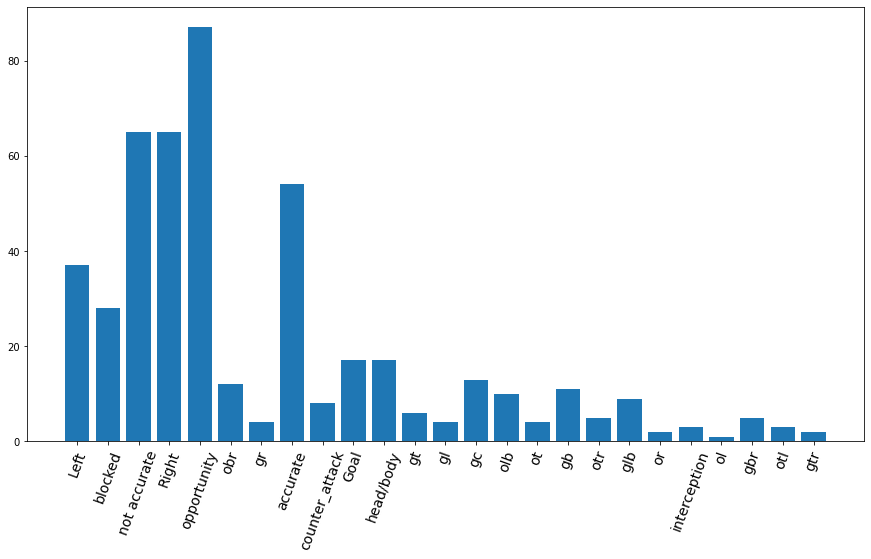

In [208]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70, fontsize=14)
plt.bar(x,y)

### Important tags

1 . A shot is considered successful if it lands on target (see Zone).
Shots on post are not considered successful

**Accurate or Not accurate***

2.Opertunity - Opportunity (API tagId: 201): Yes/No.

**Whether the shot presents a clear goalscoring chance (see Opportunity).**



In [210]:
forwardEvents.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,position,age,team,player name
331897,8,Simple pass,[{'id': 1802}],3327,"[{'y': 11, 'x': 62}, {'y': 7, 'x': 61}]",2499915,Pass,1613,2H,122.262507,85,217769280,Forward,30.0,Newcastle United FC,Jos\u00e9 Luis Sanmart\u00edn Mato
278799,7,Acceleration,[{'id': 1801}],134513,"[{'y': 8, 'x': 82}, {'y': 29, 'x': 94}]",2499884,Others on the ball,1611,2H,283.325408,70,214448216,Forward,25.0,Manchester United FC,Anthony Martial


In [233]:
## INITLIZING
forwardPlayersShots = forwardEvents[forwardEvents['eventName'] == "Shot"]
##Adding relevant columns
columns  = np.array(["Accurate", "Opportunity", "Goal"], dtype=object)



columns = np.concatenate((['playerId'], columns, ['Total shots']))
forwardShots = pd.DataFrame(columns=columns)
# #Adding all players
# #Adding all players
playerIds = list(np.unique(forwardPlayersShots['playerId']))
forwardShots['playerId'] = playerIds
forwardShots = forwardShots.fillna(0)

# # # tag_descriptions = ""
for key, row in forwardPlayersShots.iterrows():
    
    playerId = row['playerId']
    tags = row['tags']

    tag_desc = [event_tags[event_tags['Tag'] == x['id']]['Description'].values[0] for x in tags]

    index = forwardShots[forwardShots['playerId'] == playerId].index[0]
    
    forwardShots.loc[index, 'Total shots'] += 1
    if ("Accurate" in tag_desc):
        forwardShots.loc[index, 'Accurate'] += 1
    if ("Opportunity" in tag_desc):
        forwardShots.loc[index, 'Opportunity'] += 1
    if ("Goal" in tag_desc):
        forwardShots.loc[index, 'Goal'] += 1
    
            
        


In [234]:
forwardShots

,playerId,Accurate,Opportunity,Goal,Total shots
0,3324,1,1,0,1
1,3326,1,1,0,1
2,3361,0,2,0,2
3,3424,1,1,1,1
4,3577,1,1,1,1
5,3802,1,1,0,1
6,5911,1,1,0,1
7,7879,0,0,0,1
8,7905,2,2,1,2
9,7907,1,1,0,1
